In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
wh_gdgi = pd.read_csv('wh_gd_gi_final.csv')
wh_ef = pd.read_csv('wh_ef_final.csv')
wh_popden = pd.read_csv('wh_popden_final.csv')

wh2015 = wh_gdgi['Happiness Score'].to_numpy()
gd2015 = wh_gdgi['GD 2015'].to_numpy()
gi2015 = wh_gdgi['GI 2015'].to_numpy()

wh2017 = wh_popden['Happiness Score'].to_numpy()
popden2017 = wh_popden['Population Density'].to_numpy()

wh2019 = wh_ef['Happiness Score'].to_numpy()
ef2019 = wh_ef['Economic Freedom Score'].to_numpy()

In [3]:
def corr_cof(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [4]:
def leastsquares(x,y):
    # Compute slope and intercept
    slope, intercept = np.polyfit(x, y, 1)
    # Print slope and intercept
    print("Slope:", slope)
    print("Intercept:", intercept)

In [16]:
def corr_p_value(x, y, label, boolean='greater', n=10000):
    """Simulates the hypothesis that x and y are totally independent of each other 
    by permuting the x values but leaving the y values fixed"""
    # Compute observed correlation
    corr_obs = corr_cof(x, y)

    # Initialize permutation replicates: perm_replicates
    perm_replicates = np.empty(n)

    # Draw replicates
    for i in range(n):
        # Permute illiteracy measurments: illiteracy_permuted
        permuted = np.random.permutation(x)

        # Compute Pearson correlation
        perm_replicates[i] = corr_cof(permuted, y)

    # Compute p-value: p
    if boolean == 'less':
        p = np.sum(perm_replicates <= corr_obs) / len(perm_replicates)
    else:
       p = np.sum(perm_replicates >= corr_obs) / len(perm_replicates) 
    
    print('p-val =', p)
    
    # Plot sample correlation coefficients 
    plt.hist(perm_replicates, bins=20)
    plt.xlabel(label + ' Correlation Coefficients')
    plt.ylabel('# of corr_cof')
    plt.title('Distribution of Pearson correlation coefficients')
    plt.axvline(corr_obs, color='r', linestyle='--')


## World Happiness / Gender Development  

##### H<sub>0</sub> : There is NO correlation between World Happiness and Gender Development
##### H<sub>a</sub> : There IS a correlation between World Happiness and Gender Development

Correlation Coefficient: 0.5448364490624664
Slope: 0.033110698147501054
Intercept: 0.7573165554626441


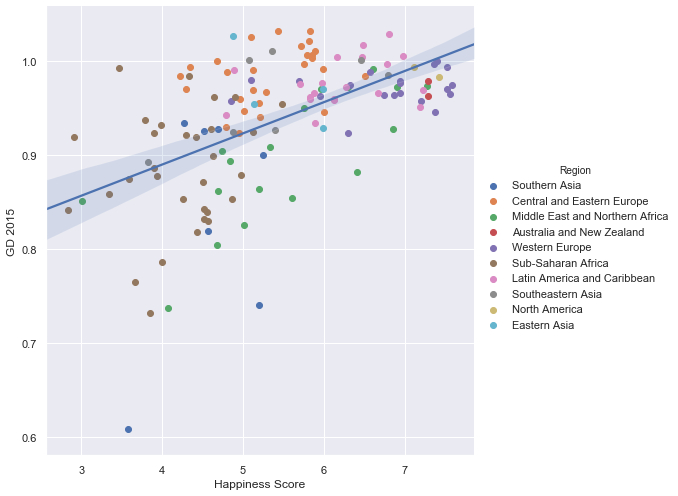

In [17]:
sns.FacetGrid(wh_gdgi, hue="Region", height=7).map(plt.scatter, "Happiness Score", "GD 2015").add_legend()
sns.regplot(x="Happiness Score", y="GD 2015", data=wh_gdgi, scatter=False)

print('Correlation Coefficient:', corr_cof(wh2015,gd2015))

leastsquares(wh2015,gd2015)

#### Hypothesis Test on Pearson correlation

p-val = 0.0


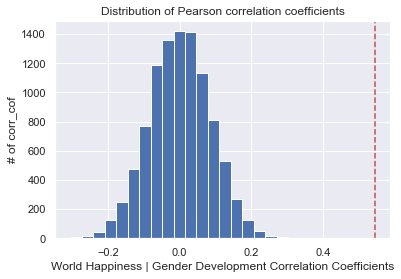

In [18]:
corr_p_value(wh2015, gd2015, 'World Happiness | Gender Development')

## World Happiness / Gender Inequality

#### H<sub>0</sub> : There is NO correlation between World Happiness and Gender Inequality   
#### H<sub>a</sub> : There IS a correlation between World Happiness and Gender Inequality

Correlation Coefficient: -0.685782324255765
Slope: -0.11397786158376921
Intercept: 0.9662685249620468


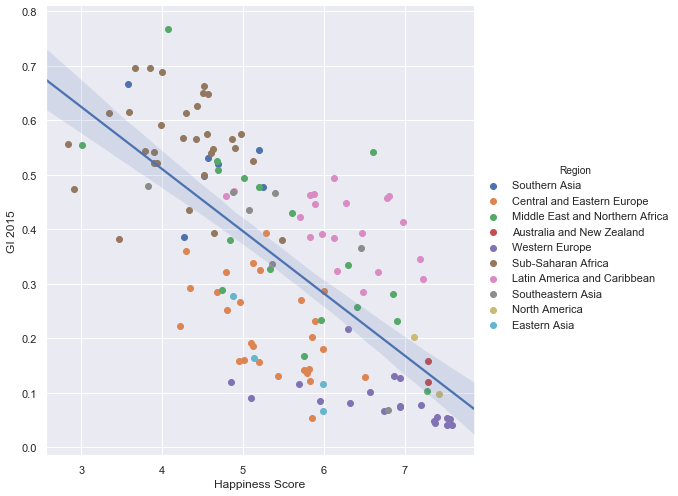

In [19]:
sns.FacetGrid(wh_gdgi, hue="Region", height=7).map(plt.scatter, "Happiness Score", "GI 2015").add_legend()
sns.regplot(x="Happiness Score", y="GI 2015", data=wh_gdgi, scatter=False)

print('Correlation Coefficient:', corr_cof(wh2015,gi2015))
leastsquares(wh2015,gi2015)

p-val = 0.0


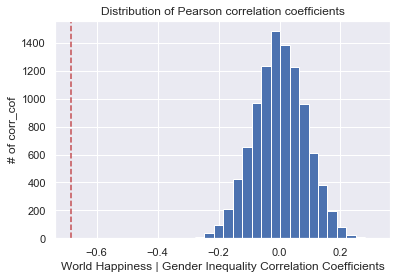

In [21]:
corr_p_value(wh2015, gi2015, 'World Happiness | Gender Inequality', boolean='less')

## World Happiness / Economic Freedom

#### H<sub>0</sub> : There is NO correlation between World Happiness and Economic Freedom   
#### H<sub>a</sub> : There IS a correlation between World Happiness and Economic Freedom

Correlation Coefficient: 0.6561274867171533
Slope: 6.139283848360954
Intercept: 28.728377877244515


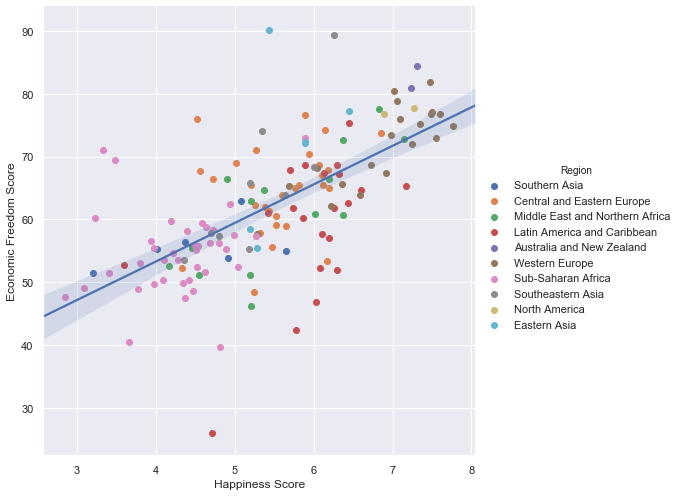

In [22]:
sns.FacetGrid(wh_ef, hue="Region", height=7).map(plt.scatter, "Happiness Score", "Economic Freedom Score").add_legend()
sns.regplot(x="Happiness Score", y="Economic Freedom Score", data=wh_ef, scatter=False)

print('Correlation Coefficient:', corr_cof(wh2019,ef2019))

leastsquares(wh2019,ef2019)

p-val = 0.0


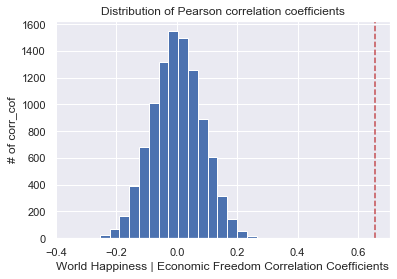

In [23]:
corr_p_value(wh2019, ef2019, 'World Happiness | Economic Freedom')

## Markdown World Happiness / Population Density

#### H<sub>0</sub> : There is NO correlation between World Happiness and Population Density  
#### H<sub>a</sub> : There IS a correlation between World Happiness and Population Density

Correlation Coefficient: 0.08551648010781092
Slope: 66.80784655082849
Intercept: -111.52118598519905


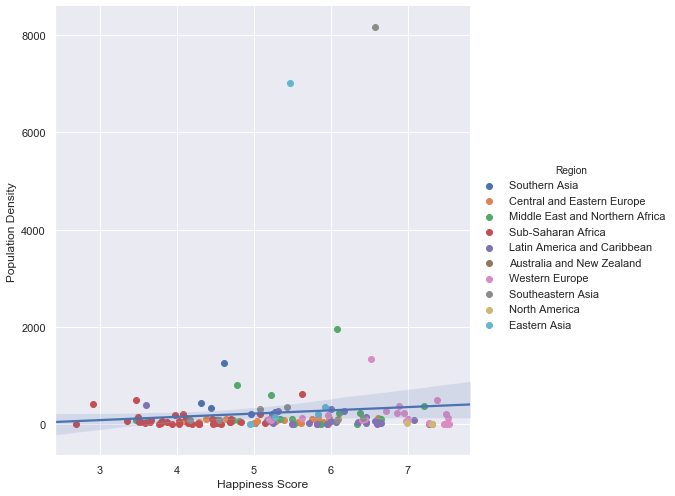

In [24]:
sns.FacetGrid(wh_popden, hue="Region", height=7).map(plt.scatter, "Happiness Score", "Population Density").add_legend()
sns.regplot(x="Happiness Score", y="Population Density", data=wh_popden, scatter=False)

print('Correlation Coefficient:', corr_cof(wh2017, popden2017))

leastsquares(wh2017, popden2017)

p-val = 0.1595


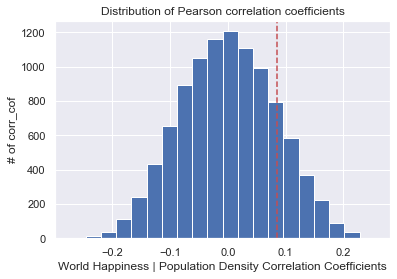

In [25]:
corr_p_value(wh2017, popden2017, 'World Happiness | Population Density')